Привет, меня зовут Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Я буду оставлять комментарии по ходу работы, их можно найти в зеленых, жёлтых и красных ячейках, таких как эти:

<div class="alert alert-block alert-success">
<b>Success:</b> Если все сделано хорошо.</div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Очень важно, чтобы ты сохранил мои комментари без изменений при доработке проекта, а также реагировал на них - описывал изменения в отдельных ячейках, помечая их другим цветом. 
Например так:
<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Графики подписаны
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Summary:</b> 
    
- Спасибо за работу, определенно могу сказать, что справился ты хорошо и проверять твою работу было приятно :)
- Код оформлен хорошо, его легко было читать. Приятно видеть, что ты не только хорошо освоился с материалами практикума, но и местами огоняешь программу.
- Здорово, что ты используешь маркадун-ячейки, однако мне кажется, в настоящий момент маркдаун - твоя слабая сторона.
- По ходу работы я оставил тебе несколько советов и некритичных замечаний. Они не означают, что ты сделал что-то не так, но могут помочь в твоем профессиональном становлении. Пожалуйста, пройдись по ним внимательно. 
- Тем не менее я не могу сразу принять твою работу, поскольку в ней присутствует пара проблем, которые очень важно разобрать сразу. И обе эти проблемы связаны с оформлением: необходимо подписать графики и поработать над общим оформлением работы. Не думаю, что это станет для тебя проблемой :) жду новую версию твоего проекта, удачи! 
</div>


<div class="alert alert-block alert-success">
<b>Summary v.2:</b> 
    
- Спасибо за внесенные исправления, теперь работа выглядит на твердую пятёрку!
- Не забывай про отработанные ремарки в следующих спринтах и тогда высок шанс, что работа с первого раза с лёгкостью пройдет код-ревью.
- Удачи в дальнейшем обучении :)
</div>

## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Напиши, пожалуйста, подробнее о нашем проекте, какие в нем данные есть. Также работу нужно разбить на четкую структуру с предобработкой и анализом данных. В каждом разделе нужно написать вывод и общий вывод ко всей работе. В начале здорово будет добавить оглавление с ссылками на соответствующие разделы работы. И не жалей хэшей, можно делать заголовки и поменьше) Советую почитать какой-нибудь markdown
    <a href="https://markdown-guide.readthedocs.io/en/latest/basics.html">guide1.</a>
    <a href="https://paulradzkov.com/2014/markdown_cheatsheet/">guide2.</a>
    
</div>

[TOC]

# Первичное знакомство с данными 

## Импорт необходимых библиотек

In [1]:
import pandas 
import pandas as pd 
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/datasets/data.csv') 

- Выведем перовые строки таблицы
- Изучим названия столбцов

In [2]:
display(df.head())
df.info()
df.describe()
print()
print("названия столбцов:", df.columns)
print()
print("Категориальные переменные")
print()
print('уникальные значения family_status:', df["family_status"].unique())
print()
print('уникальные значения gender:', df["gender"].unique())
print()
print('уникальные значения income_type:', df["income_type"].unique())
print()
print('уникальные значения purpose:', df["purpose"].unique())
print()
print("Количественные переменные")
print()
print('уникальные значения children:', df["children"].unique())
print()
print('уникальные значения days_employed:', df["days_employed"].unique())
print()
print('уникальные значения dob_years:', df["dob_years"].unique())
print()
print('уникальные значения education_id:', df["education_id"].unique())
print()
print('уникальные значения family_status_id:', df["family_status_id"].unique())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB

названия столбцов: Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Категориальные переменные

уникальные значения family_status: ['женат / замужем' 'гражданский б

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
В сообществе python-разработчиков существует такой свод правил 
    <a href="https://www.python.org/dev/peps/pep-0008/">PEP-8.</a>
    Одним из правил хорошего тона при написании кода является расположение всех импортов в начале программы (в первой ячейке с кодом в нашем случае) в алфавитном порядке.✔
    
Также советую прочесть эту <a href="https://habr.com/ru/post/483408/">статью.</a> о том, как принято пользоваться Jupyter'ом. 
    
В кратце - не стоит писать так много кода в одной ячейке, лови баланс)

✔ Также советую использовать функцию describe() для знакомства с данными.
</div>

### Вывод 1

1. Таблица содержит 12 стобцов и 21525 строк.
2. В столбцах days_employed и total_income есть пропуски, которые необходимо отработать.
3. В таблице имеются три типа данных, два числовые и 1 object.
4. В столбце days_employed присутствуют отрицательное и дробные значания, а должны быть только целочисленные и положительные значения. 
5. В столбце education данные записаны строчными и прописными буквами. 
6. В столбце gender есть непонятное XNA. 
7. В столбце children существуют аномалии с количеством детей 20 и отрицательным количеством детей
8. В столбце dob_years существуют нулевые значения 

# Предобработка данных

## Обработка пропусков

Определим количество пропусков в каждом столбце 

In [3]:
print(df['days_employed'].isna().sum()) 
print(df['total_income'].isna().sum())

2174
2174


Выведим 30 строк с пропущенными значениями  в столбцах 

In [4]:
display(df[df['days_employed'].isnull()].head(30)) 
display(df[df['total_income'].isnull()].tail(30)) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21226,3,NaN,38,среднее,1,гражданский брак,1,M,сотрудник,0,NaN,получение образования
21242,1,NaN,33,высшее,0,Не женат / не замужем,4,F,госслужащий,0,NaN,строительство собственной недвижимости
21251,0,NaN,57,неоконченное высшее,2,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21258,1,NaN,40,среднее,1,Не женат / не замужем,4,M,сотрудник,0,NaN,операции с жильем
21268,1,NaN,44,высшее,0,гражданский брак,1,F,госслужащий,0,NaN,на проведение свадьбы
21271,2,NaN,42,среднее,1,гражданский брак,1,M,сотрудник,1,NaN,операции со своей недвижимостью
21281,1,NaN,30,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,покупка коммерческой недвижимости
21294,0,NaN,45,ВЫСШЕЕ,0,женат / замужем,0,F,сотрудник,0,NaN,высшее образование
21300,2,NaN,45,Среднее,1,гражданский брак,1,M,компаньон,0,NaN,получение дополнительного образования
21305,0,NaN,59,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство собственной недвижимости


Приведем к нормальному виду значения в столбце days_employed 

In [5]:
df['days_employed']=df['days_employed'].abs()

Переведем трудовой стаж в годы

In [6]:
df['days_employed']=df['days_employed']/365

Проверим максимально возможный стаж сравнив его с максимальным возрастом заемщика 

In [7]:
print("максимально возможный стаж:", df['dob_years'].max())

максимально возможный стаж: 75


 - Самый старый заемщик может иметь трудовой стаж не более 75-18=57 лет, следовательно значение в столбце days_employed не может превышать 57
 - Посчитаем количество заемщиков со стажем больше 57 лет 

In [8]:
max_years_employed = df[df['days_employed']>57]['days_employed'].count()

Выведем % таких заемщиков от общего числа заемщиков

In [9]:
print('Доля заемщиков с максимльно возможным стажем:', max_years_employed/len(df)*100)

Доля заемщиков с максимльно возможным стажем: 16.004645760743323


- Для опредления каким образом заменить пропуски в столбце total_income вычислим максимальное, минимальное, 
- Выведем статистику по столбцу total_income

In [10]:
print('статистика по столбцу total_income:', df['total_income'].sum(),
df['total_income'].min(),
df['total_income'].max(),
df['total_income'].mean(),
df['total_income'].median())

статистика по столбцу total_income: 3239788970.0303545 20667.26379327158 2265604.028722744 167422.30220817294 145017.93753253992


Заменим пропущенные значения в столбце total_income на медианные 

In [11]:
df['total_income']=df['total_income'].fillna(145017.93753253992)

Проверим совпадет ли количество заменнных значений с количеством пропусков

In [12]:
print(df[df['total_income']==145017.93753253992]['total_income'].count())

2175


Заменим пропуски в столбце days_employed на 0 

In [13]:
df['days_employed'] = df['days_employed'].fillna(0)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
✔ И еще один важный момент. Попробуй писать, пожалуйста, все комментарии, которые не относятся к коду, в ячейках Markdown. Это сильно повысит читаемость исследований.

Через # обычно пишут пояснение к технической работе кода или описание переменных, но не описание исследования.

Это не обязательное требование в этой работе, но у тебя еще будут проекты далее ;)
</div>

### Вывод 2

1. Количество пропущенных значений в столбцах равно 2174 и совпадает 
2. Корреляции между пропущенным значенем и данными в других столбцах сразу не наблюдается.
3. Пропусков больше 10%, поэтому просто выкинуть их нельзя - будут неточные выводы из-за потери большого количества информации.
4. Количество заемщиков с нереально большим стажем превышает 16%. Учитывая, что в этом столбце есть отрицательные и дробные значения можно предположить, что туда вообще неправильно ввели данные. Лучше уточнить правдивость этих данных прежде чем выдумывать функции для их заполнения. Учитывая, что это 16% данных лучше вообще их не учитывать при последующем анализе.
5. Разница в доходах большая, однако просрочку кредита вероятно чаще всего допускают менее обеспеченные граждане, поэтому заменим пропуски в этом столбце медианным значением по выборке. 

<div class="alert alert-block alert-success">
Отличные наблюдения!
</div>

## Замена типа данных

Изменим тип данных в столбцах days_employed и total_income с float64 на int64

In [14]:

df['days_employed'].astype('int64')
df['total_income'].astype('int64')

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int64

<div class="alert alert-block alert-warning">
<b>Remarks:</b> ✔ Советую больше внимания обращать на типы данных, они могут оказаться очень полезными в твоей будущей работе. Когда речь идет о действительно больших обьемах информации, грамотное преобразование может спасти много памяти. Если интересно, 
<a href="https://pyprog.pro/data_types.html">почитай</a>
</div>

### Вывод 3

Замена типа данных в столбцах days_employed и total_income позволяет получить целые значения вместо дробных и следовательно убрать проблемы с записью дробных чисел в двоичной системе исчисления. 

<div class="alert alert-block alert-success">
Это конечно да, но когда ты пишешь int64, следует понимать, почему ты это делаешь? Почему не int32 или 16? Почему не unit. 
</div>

## Обработка дубликатов

Определим количество дубликатов в наборе данных и удалим их

In [15]:
print("Количество дубликатов:", df.duplicated().sum()) 
df = df.drop_duplicates().reset_index(drop=True)
print()
print("Неявные дубликаты в столбцах с категориями:")
print()
print(df['education'].unique())
print()
print(df['family_status'].unique())
print()
print(df['gender'].unique)
print()
print(df['income_type'].unique())
print()
print(df['purpose'].unique())

Количество дубликатов: 54

Неявные дубликаты в столбцах с категориями:

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']

<bound method Series.unique of 0        F
1        F
2        M
3        M
4        F
        ..
21466    F
21467    F
21468    M
21469    M
21470    F
Name: gender, Length: 21471, dtype: object>

['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недви

Заменим все буквы в столбце education на строчные 

In [16]:
df['education']=df['education'].str.lower()
print("Уникальные значения в столбце education после замены букв на строчные:", df['education'].unique())

Уникальные значения в столбце education после замены букв на строчные: ['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


Обработаем данные в столбце children

In [17]:
df['children']=df['children'].abs()
print("Уникальные значения в столбце children после удаления отрицательных значений:", df['children'].unique())
max_children = df[df['children']>5]['children']
print("Количество заемщиков с более чем 5 детьми:", max_children.unique())
#заменим значение в столбце children равные 20 на 2 
df['children']=df['children'].replace(20, 2)
print('Уникальные значения в столбце children после обработки:', df['children'].unique())

Уникальные значения в столбце children после удаления отрицательных значений: [ 1  0  3  2  4 20  5]
Количество заемщиков с более чем 5 детьми: [20]
Уникальные значения в столбце children после обработки: [1 0 3 2 4 5]


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Насчет дубликатов - т.к. уникального индетификатора тсроки у нас нет, отличить дубликат от настоящего совпадения невозможно, однако в контексте данной работы удалить их можно, но понимать это важно.

✔ Читать такое полотно трудновато, было бы лучше разделить на логические блоки.    
</div>

### Вывод 4

1. Явных дубликатов всего 54, однако существуют проблемы в столбце education из-за различного написания одних и тех же слов.
2. Переводим буквы в столбце education в строчный формат и избавляемся от дубликатов.
3. Учитывая, что аномальное количество детей только 20 и других значений нет разумно предположить, что по какой-то причине к цифре 2 добавился нолик. Количество детей равное 2 близко к среднему количеству детей по выборке, поэтому будет разумно заменить 20 на 2. 

## Лемматизация

Лемматизируем данные в столбце purpose

In [18]:
corpus=df.purpose
lemmer=Mystem()
def lemmatize(text):
    return ' '.join([word for word in lemmer.lemmatize(text) if word.isalpha()])
corpus.apply(lemmatize)
print(df.columns)

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


Добавим лемматизированный столбец в датафрейм

In [19]:
df.loc[:, 'lemmed']=corpus.apply(lemmatize) 
print(df['lemmed'])

0                     покупка жилье
1           приобретение автомобиль
2                     покупка жилье
3        дополнительный образование
4                   сыграть свадьба
                    ...            
21466              операция с жилье
21467           сделка с автомобиль
21468                  недвижимость
21469    на покупка свой автомобиль
21470         на покупка автомобиль
Name: lemmed, Length: 21471, dtype: object


Посчитаем частоту употребления слов и отсортируем по убыванию 

In [20]:
Counter(' '.join(df.lemmed).split()).most_common()

[('недвижимость', 6353),
 ('покупка', 5900),
 ('жилье', 4461),
 ('автомобиль', 4308),
 ('образование', 4014),
 ('с', 2918),
 ('операция', 2604),
 ('свадьба', 2335),
 ('свой', 2231),
 ('на', 2228),
 ('строительство', 1879),
 ('высокий', 1374),
 ('получение', 1315),
 ('коммерческий', 1312),
 ('для', 1290),
 ('жилой', 1231),
 ('сделка', 941),
 ('дополнительный', 907),
 ('заниматься', 904),
 ('проведение', 773),
 ('сыграть', 769),
 ('сдача', 652),
 ('семья', 638),
 ('собственный', 635),
 ('со', 627),
 ('ремонт', 607),
 ('подержанный', 486),
 ('подержать', 478),
 ('приобретение', 461),
 ('профильный', 436)]

Создадим функцию для объединения данных в категории

In [21]:
def category_purpose (lemmed): 
        if 'недвижимость' in lemmed or 'жилье' in lemmed:
            return 'недвижимость' 
        elif 'автомобиль' in lemmed:
            return  'автомобиль' 
        elif 'образование' in lemmed:
            return  'образование' 
        elif 'свадьба' in lemmed:
            return  'свадьба'  
        elif 'строительство' in  lemmed or 'ремонт' in lemmed:
            return 'стройка' 
        else: 
            return 'прочее'

Применим функцию к столбцу purpose_category

In [22]:
df['purpose_category']=df['lemmed'].apply(category_purpose)
print(df['purpose_category'].unique())

['недвижимость' 'автомобиль' 'образование' 'свадьба']


<div class="alert alert-block alert-success">
<b>Success:</b> Лемматизация прошла великолепно! </div>

### Вывод 5

1. В столбце income_type все категории разные, поэтому объединять ничего не нужно. 
2. В столбце purpose много схожих категорий. Сократим количество категорий за счет объединения и запишем их в отдельном столбце. 
3. Полученные категории: 'недвижимость', 'автомобиль', 'образование', 'свадьба'.

# Категоризация данных

Рассчитаем долю должников в зависимости от количества детей, %

In [23]:
debt_sum=df[df['debt'] == 1]['debt'].count()
print('Количество должников:', debt_sum)
procent_debt=debt_sum/len(df)*100
print('Доля должников:', procent_debt)
children_category=df.groupby('children').agg({'children': 'count', 'debt': 'sum'})
children_category['procent_debt']=children_category['debt']/len(df)*100
print(children_category)

Количество должников: 1741
Доля должников: 8.108611615667645
          children  debt  procent_debt
children                              
0            14107  1063      4.950864
1             4856   445      2.072563
2             2128   202      0.940804
3              330    27      0.125751
4               41     4      0.018630
5                9     0      0.000000


## Ответы на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Связь есть, чем меньше детей, тем больше вероятность невозврата кредита в срок . Причем чем больше детей тем надежнее заемщик. Среди бездетных количество должников - 4,95%. Среди тех у кого двое детей - 0,94%. По остальным категориям данных слишком мало.

<div class="alert alert-block alert-success">
<b>Success:</b>Согласен. Но в выводах лучше писать конкретные числа, проценты итд</div>

Рассчитаем % должников в зависимости от семейного положения

In [24]:
family_category=df.groupby('family_status').agg({'family_status': 'count', 'debt': 'sum'})
family_category['procent_debt']=family_category['debt']/len(df)*100
print(family_category)

                       family_status  debt  procent_debt
family_status                                           
Не женат / не замужем           2810   274      1.276140
в разводе                       1195    85      0.395883
вдовец / вдова                   959    63      0.293419
гражданский брак                4163   388      1.807089
женат / замужем                12344   931      4.336081


- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Зависисмость есть. Больше всего должников среди семейных (4,63%) и меньше всего среди тех кто был когда-то семейным (0,29-0,39%). 

Рассчитаем медиану, среднее, максимальное и минимальное значение для столбца total_income

In [25]:
print(df['total_income'].min(),
df['total_income'].max(),
df['total_income'].mean(),
df['total_income'].median())

20667.26379327158 2265604.028722744 165210.14380323875 145017.93753253992


Распределим всех заемщиков по уровню дохода на 3 категории. Богатые, средний класс, бедные.

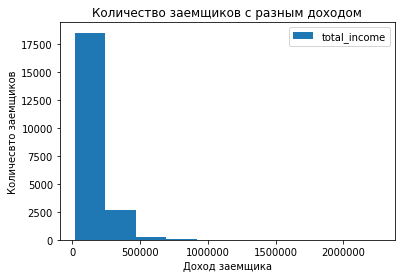

In [30]:
df.plot(y='total_income', kind='hist', title='Количество заемщиков с разным доходом')
plt.xlabel("Доход заемщика")
plt.ylabel("Количесвто заемщиков")
def total_income_group (total_income): 
    if total_income<df['total_income'].median():
        return 'бедные'
    if total_income <= df['total_income'].max()*0.5:
        return 'средний класс'
    return 'богатые'

Посчитаем долю должников в % в зависимости от уровня дохода

In [27]:
df['total_income_group'] = df['total_income'].apply(total_income_group)
print(df['total_income_group'].head(10))
total_incom_category=df.groupby('total_income_group').agg({'total_income_group': 'count', 'debt': 'sum'})
total_incom_category['procent_debt']=total_incom_category['debt']/len(df)*100
print(total_incom_category)



0    средний класс
1           бедные
2    средний класс
3    средний класс
4    средний класс
5    средний класс
6    средний класс
7           бедные
8           бедные
9           бедные
Name: total_income_group, dtype: object
                    total_income_group  debt  procent_debt
total_income_group                                        
бедные                            9675   804      3.744586
богатые                             14     1      0.004657
средний класс                    11782   936      4.359368


<div class="alert alert-block alert-warning">
<b>Remarks:</b> ✔ Подпиши график - оси и заголовок</div>

### Вывод 6

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Зависимость есть. Чем беднее тем больше долгов. Богатые практически не просрачивают возврат кредита (0,005%), среди бедных количесвто должников - 3,74%, средник класс - 4,36%.

In [28]:
#посчитаем % должников в каждой категории 
purpose_category=df.groupby('purpose_category').agg({'purpose_category': 'count', 'debt': 'sum'})
purpose_category['procent_debt']=purpose_category['debt']/len(df)*100
print(purpose_category)

                  purpose_category  debt  procent_debt
purpose_category                                      
автомобиль                    4308   403      1.876950
недвижимость                 10814   782      3.642122
образование                   4014   370      1.723255
свадьба                       2335   186      0.866285


### Вывод 7

 - Как разные цели кредита влияют на его возврат в срок? 
 - Больше всего должников среди заемщиков на покупку недвижимости (3,64%), меньше всего среди тех кто берет кредит на организацию свадьбы (0,87%)

In [29]:
#посчитаем % должников в зависимости от возраста
#разделим заемщиков на три категории: молодежь, средний возраст, пенсионеры
def dob_years_group (dob_years): 
    if dob_years<35:
        return 'молодежь'
    if dob_years <= 65:
        return 'средний возраст'
    return 'пенсионеры'
#добавим столбец с категоризированными данными по возрасту
df['dob_years_group'] = df['dob_years'].apply(dob_years_group)
print(df['dob_years_group'].head(10))
#посчитаем % должников в каждой категории 
dob_years_category=df.groupby('dob_years_group').agg({'dob_years_group': 'count', 'debt': 'sum'})
dob_years_category['procent_debt']=dob_years_category['debt']/len(df)*100
print(dob_years_category)

0    средний возраст
1    средний возраст
2           молодежь
3           молодежь
4    средний возраст
5           молодежь
6    средний возраст
7    средний возраст
8    средний возраст
9    средний возраст
Name: dob_years_group, dtype: object
                 dob_years_group  debt  procent_debt
dob_years_group                                     
молодежь                    6070   659      3.069256
пенсионеры                   704    35      0.163011
средний возраст            14697  1047      4.876345


### Вывод 8

- Больше всего должников среди людей среднего возраста (4,87%), а меньше всего среди пенсионеров (0,16%)

# Общий вывод

1. Данные могут быть избыточны для решения задачи, поэтому необязательно тратить время на обработку всех данных, а можно обработать только те данные, которые важны для решения задачи. В даннос случае столбец days_employed содержит неверные и данные, но для анализы эти данные не критичны.
2. Порой причины ошибок в данных неочивидны и лучше узнать причины их появления у поставщика данных, чем выдумать способ заполнения пропусков. В данном случае необходимо проконсультироватсья с поставщиком данных насчет значений в столбце days_employed. 
3. Среди бездетных количество должников - 4,95%. Среди тех у кого двое детей - 0,94%. По остальным категориям данных слишком мало.
4. Больше всего должников среди семейных (4,63%) и меньше всего среди тех кто был когда-то семейным (0,29-0,39%). 
5. Больше всего должников среди людей среднего возраста (4,87%), а меньше всего среди пенсионеров (0,16%)
6. Богатые практически не просрачивают возврат кредита (0,005%), среди бедных количество должников - 3,74%, средник класс - 7,36%.
8. Наиболее дисциплинированными заемщиками являются пенсионеры с большим количеством детей, высоким уровнем дохода, в прошлом связанные узами брака и целью кредита автомобиль 
9. Наименее дисциплинированные заемщики среднего возраста, целью кредита недвижимость, с уровнем дохода около среднего или ниже, состоящие в браке, но не имеющие детей.

<div class="alert alert-block alert-warning">
<b>Remarks:</b> ✔ Важно понять, что эти проекты это скорее исследование, чем лабораторная работа в университете. Выводы нужно писать как резюме диссертации - так, чтобы прочитав общий вывод можно было узнать всю информацию, которую ты нашел в процессе исследования. Все зависимости (отранжированные по степени влияния), с процентами, числами, метриками. В общим пиши общий вывод так, чтобы убрав из рабоыт все, крмое него, мы не потеряли ни одного инсайда из данных. </div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [ ]  файл изучен;
- [ ]  определены пропущенные значения;
- [ ]  заполнены пропущенные значения;
- [ ]  есть пояснение, какие пропущенные значения обнаружены;
- [ ]  описаны возможные причины появления пропусков в данных;
- [ ]  объяснено, по какому принципу заполнены пропуски;
- [ ]  заменен вещественный тип данных на целочисленный;
- [ ]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [ ]  удалены дубликаты;
- [ ]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [ ]  описаны возможные причины появления дубликатов в данных;
- [ ]  выделены леммы в значениях столбца с целями получения кредита;
- [ ]  описан процесс лемматизации;
- [ ]  данные категоризированы;
- [ ]  есть объяснение принципа категоризации данных;
- [ ]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [ ]  в каждом этапе есть выводы;
- [ ]  есть общий вывод.